## Variables aleatorias y gráficos
## Desafío 1: Variables 
* Autor: Walther Becks

### 1. Genere una submuestra de casos
* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
* Seleccione el 50% de los casos.
* Cada base generada debe contener los siguientes elementos:
    * El índice de desarrollo humano (undp_hdi).
    * El nombre del país (ccodealp).
    * La región a la que pertenece (ht_region).
    * El PIB per capita. (gle_cgdpc).
    * El total de la población (imf_pop).
* Si su apellido está entre la A y la M, escoja las siguientes variables del módulo
Educación:
    * ffp_hf: Human Flight and Brain Drain.
    * wef_qes: Quality of the educational system.
    * wdi_expedu: Government expenditure on education, total (% of GDP).
    * wdi_ners: School enrollment, secondary (% net).
* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    * wef_imort: Infant mortality, deaths/1000 live births.
    * who_alc2000: Alcohol consumption per capita (2000-).
    * who_tobt: Current smoking of any tobacco product (Total).
    * wdi_exph: Government expenditure on health, total (% of GDP).
    * Guarde esta tabla procesada en un nuevo objeto.
    * Renombre las categorías de la variable ht_region de números a regiones.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
#plt.rcParams["figure.figsize"] = (4, 2) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [2]:
df = pd.read_csv("C:\\Users\\Walther\\Documents\\Cursos\\Desafío Latam - Data Science\\2.- Fundamentos Data Science\\3.- Variables aleatorias y graficos\\1.- Apoyo Desafío - Gráficos\\qog_std_cs_jan18.csv")
df.sample(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
13,51,Armenia,ARM,371.0,51.0,QoGStdCSJan18,NaN,NaN,22.0,16.0,...,3.232072,1.774057,2.358851,4.248916,5.240819,6.825514,3.317059,-0.592649,-0.479951,0.11023
100,440,Lithuania,LTU,368.0,440.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,50,Bangladesh,BGD,771.0,50.0,QoGStdCSJan18,NaN,NaN,25.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28,Antigua and Barbuda,ATG,58.0,28.0,QoGStdCSJan18,NaN,NaN,11.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,688,Serbia,SRB,NaN,NaN,QoGStdCSJan18,NaN,NaN,25.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
#### Seleccione el 50% de los casos.

In [3]:
subsample_nz = df.sample(frac=.5, random_state=6934)
subsample_nz.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
17,68,Bolivia,BOL,145.0,68.0,QoGStdCSJan18,NaN,NaN,23.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,492,Monaco,MCO,221.0,492.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,398,Kazakhstan,KAZ,705.0,398.0,QoGStdCSJan18,NaN,NaN,21.0,13.0,...,2.222265,2.184994,2.082892,6.047588,7.233835,5.042399,3.697504,-0.370665,-0.132748,0.383327
176,788,Tunisia,TUN,616.0,788.0,QoGStdCSJan18,NaN,NaN,27.0,12.0,...,3.542241,2.202532,3.654278,4.958368,5.582638,5.068657,3.914452,-0.880657,-0.586506,0.159966
92,417,Kyrgyzstan,KGZ,703.0,417.0,QoGStdCSJan18,NaN,NaN,22.0,18.0,...,3.016760,2.282222,2.981036,6.380667,6.963087,5.668449,3.908545,-0.355836,-0.341541,0.380420


#### Creación base

In [4]:
lista_base = ['undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop']

#### Si su apellido está entre la A y la M

In [5]:
lista1 = ['ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']

In [6]:
lista_total = lista_base+lista1

In [8]:
subsample = subsample_nz[lista_total]
subsample = subsample.sort_values(by='ccodealp')
subsample.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,0.479,AFG,8,1282.64000,29.825001,8.1,NaN,3.78028,48.750320
175,0.836,ARE,3,20310.10900,NaN,2.5,5.279841,NaN,NaN
7,0.826,ARG,2,15102.61000,41.733002,3.0,2.983357,5.32549,88.246002
26,0.406,BDI,4,663.57001,NaN,6.8,2.595249,5.41642,24.948179
47,0.481,BEN,4,1413.05000,10.320000,6.8,2.393939,4.32068,44.969818
187,0.399,BFA,4,1095.96000,16.500000,6.9,2.868712,4.60476,26.492809
11,0.823,BHR,3,22498.48000,1.268000,3.5,4.319010,2.46746,88.250397
10,0.790,BHS,10,21672.02900,0.356000,5.0,NaN,NaN,NaN
18,0.747,BIH,1,8507.65040,3.871000,5.5,2.355769,NaN,NaN
27,0.798,BLR,1,17780.64100,9.468000,3.4,NaN,4.99044,99.465446


### 2. Genere una función que ingrese su objeto y devuelva:
* Por cada variable existente en su objeto, calcule las medidas descriptivas para los
casos continuos.
* Para cada variable discreta, que calcule la frecuencia.
* Reporte las estadísticas descriptivas para gle_cgdpc, undp_hdi, imf_pop.
Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en
alguna de ellas?

In [8]:
## Casos continuos
subsample.describe()

,undp_hdi,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
count,93.000000,97.000000,97.000000,69.000000,89.00000,74.000000,65.000000,69.000000
mean,0.692075,4.412371,13617.633845,26.154783,5.67191,3.593523,4.747203,74.010215
std,0.152802,2.676100,18340.537352,41.545974,1.97875,0.892625,1.852479,21.671533
min,0.394000,1.000000,324.160000,0.011000,1.50000,1.896328,1.021950,23.102320
25%,0.555000,2.000000,2584.600100,3.369000,4.20000,2.916990,3.208170,62.838310
50%,0.723000,4.000000,6912.279800,8.212000,5.80000,3.574082,4.910830,80.731201
75%,0.798000,6.000000,18020.410000,33.179001,7.30000,4.284761,5.658730,92.205231
max,0.938000,10.000000,108481.130000,252.164993,9.30000,5.986858,12.467750,99.573357


In [9]:
## Variable discreta
subsample.describe(include=object)

,ccodealp
count,97
unique,97
top,KEN
freq,1


In [10]:
## Total
subsample.describe(include='all')

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
count,93.000000,97,97.000000,97.000000,69.000000,89.00000,74.000000,65.000000,69.000000
unique,NaN,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,KEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.692075,NaN,4.412371,13617.633845,26.154783,5.67191,3.593523,4.747203,74.010215
std,0.152802,NaN,2.676100,18340.537352,41.545974,1.97875,0.892625,1.852479,21.671533
min,0.394000,NaN,1.000000,324.160000,0.011000,1.50000,1.896328,1.021950,23.102320
25%,0.555000,NaN,2.000000,2584.600100,3.369000,4.20000,2.916990,3.208170,62.838310
50%,0.723000,NaN,4.000000,6912.279800,8.212000,5.80000,3.574082,4.910830,80.731201
75%,0.798000,NaN,6.000000,18020.410000,33.179001,7.30000,4.284761,5.658730,92.205231


In [153]:
subsample[['gle_cgdpc', 'undp_hdi', 'imf_pop']].describe()

,gle_cgdpc,undp_hdi,imf_pop
count,97.000000,93.000000,69.000000
mean,13617.633845,0.692075,26.154783
std,18340.537352,0.152802,41.545974
min,324.160000,0.394000,0.011000
25%,2584.600100,0.555000,3.369000
50%,6912.279800,0.723000,8.212000
75%,18020.410000,0.798000,33.179001
max,108481.130000,0.938000,252.164993


### 3. Genere una función que liste las observaciones perdidas de una variable
* La función debe contener los siguientes argumentos:
    * dataframe: La función debe ingresar un objeto DataFrame.
    * var: Variable a inspeccionar.
    * print_list: Opción para imprimir la lista de observaciones perdidas en la
variable. Debe ser False por defecto.
* La función debe retornar la cantidad de casos perdidos y el porcentaje
correspondiente.
* Cuando print_list = True, debe retornar la lista de casos.
* Analice todas las variables y sus casos perdidos.
Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de
países con ausencia de datos.

In [9]:
lista_casos = {}
for i in subsample.axes[1]:
    print(i," - ",subsample[i].isna().sum(), " - ", len(subsample[i]), " - ",round(subsample[i].isna().sum()/len(subsample[i])*100,2),"%")
    lista_casos[i] = float(round(subsample[i].isna().sum()/len(subsample[i]),2))
    
def inspeccion(df,var,print_list=False):
    for i in df.axes[1]:
        if i == var:
            print(f"Variable: {i}"," - ",f"Casos perdidos: {df[i].isna().sum()}" ," - ",f"Casos totales: {len(df[i])}" ," - ", f"Porcentaje: {round(df[i].isna().sum()/len(df[i])*100,2)} %")
            if print_list:
                return df[df[i].isna()]
            

undp_hdi  -  4  -  97  -  4.12 %
ccodealp  -  0  -  97  -  0.0 %
ht_region  -  0  -  97  -  0.0 %
gle_cgdpc  -  0  -  97  -  0.0 %
imf_pop  -  28  -  97  -  28.87 %
ffp_hf  -  8  -  97  -  8.25 %
wef_qes  -  23  -  97  -  23.71 %
wdi_expedu  -  32  -  97  -  32.99 %
wdi_ners  -  28  -  97  -  28.87 %


In [10]:
inspeccion(subsample,'wdi_expedu',True)

Variable: wdi_expedu  -  Casos perdidos: 32  -  Casos totales: 97  -  Porcentaje: 32.99 %


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
175,0.836,ARE,3,20310.1090,NaN,2.5,5.279841,NaN,NaN
10,0.790,BHS,10,21672.0290,0.356000,5.0,NaN,NaN,NaN
18,0.747,BIH,1,8507.6504,3.871000,5.5,2.355769,NaN,NaN
19,0.698,BWA,4,12770.7300,NaN,5.1,3.523580,NaN,NaN
36,0.734,CHN,6,9283.3799,NaN,4.6,4.028250,NaN,NaN
40,0.590,COG,4,2369.8401,NaN,6.8,NaN,NaN,NaN
44,0.773,CUB,2,5899.9399,NaN,5.7,NaN,NaN,87.485672
49,0.724,DMA,10,12613.7200,NaN,NaN,NaN,NaN,86.320930
50,0.718,DOM,2,10376.6300,NaN,7.6,2.636395,NaN,65.457611
2,0.743,DZA,3,5402.1699,39.113998,5.1,2.977302,NaN,NaN


#### Analice todas las variables y sus casos perdidos. Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [17]:
new_df = pd.DataFrame(data=lista_casos,index=[0]).transpose().sort_values(by=0,ascending=False)
new_df.head(3)

,0
wdi_expedu,0.33
imf_pop,0.29
wdi_ners,0.29


In [89]:
paises_con_ausencia_datos = subsample['ccodealp'][(subsample['wdi_ners'].isna()) | (subsample['wdi_expedu'].isna()) | (subsample['imf_pop'].isna())]
print(f"Total paises con ausencia de datos: {paises_con_ausencia_datos.count()}; Total de casos: {subsample['ccodealp'].count()}\nLista paises:")
paises_con_ausencia_datos

Total paises con ausencia de datos: 54; Total de casos: 97
Lista paises:


175    ARE
26     BDI
10     BHS
18     BIH
19     BWA
36     CHN
29     CMR
41     COD
40     COG
42     CRI
44     CUB
49     DMA
50     DOM
2      DZA
55     ERI
128    FSM
65     GHA
67     GRC
68     GRD
73     HND
72     HTI
79     IRQ
87     JOR
88     KEN
91     KWT
97     LBR
99     LIE
115    MAR
111    MCO
102    MDG
25     MMR
126    NGA
119    NRU
136    PHL
133    PNG
151    SEN
22     SLB
154    SLE
149    STP
156    SVK
169    SYR
34     TCD
172    TGO
178    TKM
174    TTO
176    TUN
179    TUV
37     TWN
189    UZB
190    VEN
157    VNM
191    WSM
192    YEM
160    ZAF
Name: ccodealp, dtype: object

### 4. Grafique los histogramas
* Genere una función que grafique un histograma en conjunto y señala las medias.
* La función debe incluir los siguientes argumentos:
    * dataframe: La base de datos donde se encuentran los datos específicos.
    * var: La variable a graficar.
    * sample_mean: Booleano. Si es verdadero, debe generar una recta vertical
indicando la media de la variable en la selección muestral. Por defecto debe
ser False.
    * true_mean: Booleano. Si es verdadero, debe generar una recta vertical
indicando la media de variable en la base de datos completa.
* Implemente las funciones para las 4 variables seleccionadas según su grupo.
¿En qué variables la media de la submuestra es mayor a la de la muestra completa?


In [105]:
def histo(df,var,sample_mean=False,true_mean=False):
    """
    df: El Data Frame donde se encuentran los datos específicos.
    var: La variable a graficar.
    sample_mean: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False.
    true_mean: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.
    """
    true_df = pd.read_csv("C:\\Users\\Walther\\Documents\\Cursos\\Desafío Latam - Data Science\\2.- Fundamentos Data Science\\3.- Variables aleatorias y graficos\\1.- Apoyo Desafío - Gráficos\\qog_std_cs_jan18.csv")
    plt.hist(df[var],color='lightgrey',fc=(.3, 0, .4, 0.4))
    plt.xlabel('IDH')
    plt.ylabel('Frecuencia')
    if sample_mean:
        plt.axvline(df[var].mean(),lw=3,color='tomato',linestyle='--')
        plt.annotate(s='sample_mean',xy=(df[var].mean()+0.05,0.06),color='tomato',rotation=60,size=11,ha='center')
        
    if true_mean:
        plt.axvline(true_df[var].mean(),lw=3,color='lightblue',linestyle='--')
        plt.annotate(s='true_mean',xy=(true_df[var].mean()+0.05,0.06),color='lightblue',rotation=60,size=11,ha='center')


Recordatorio de variables:
* ffp_hf: Human Flight and Brain Drain.
* wef_qes: Quality of the educational system.
* wdi_expedu: Government expenditure on education, total (% of GDP).
* wdi_ners: School enrollment, secondary (% net).

In [106]:
print("Para la variable de ffp_hf, la muestra tiene una media mayor al de la muestra completa")

Para la variable de ffp_hf, la muestra tiene una media mayor al de la muestra completa


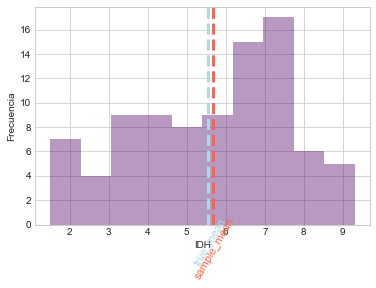

In [107]:
histo(subsample,'ffp_hf',sample_mean=True,true_mean=True)

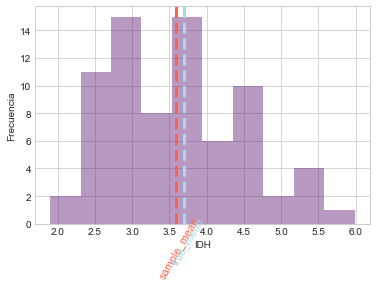

In [108]:
histo(subsample,'wef_qes',sample_mean=True,true_mean=True)

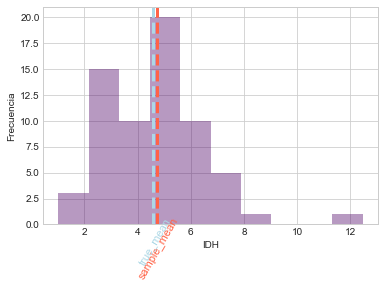

In [109]:
histo(subsample,'wdi_expedu',sample_mean=True,true_mean=True)

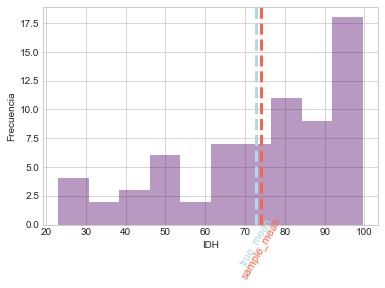

In [110]:
histo(subsample,'wdi_ners',sample_mean=True,true_mean=True)

### 5. Genere una función que devuelva un dotplot
* La función debe contener los siguientes argumentos como argumentos:
    * dataframe: La tabla de datos donde buscar las variables.
    * plot_var: La variable a analizar y extraer las medias.
    * plot_by: La variable agrupadora.
    * global_stat: Booleano. Si es True debe graficar la media global de la
variable. Por defecto debe ser False.
    * statistic: Debe presentar dos opciones. mean para la media y median para
la mediana. Por defecto debe ser mean.
* Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [148]:
def dotplot(dataframe,plot_var,plot_by,global_stat=False,statistic='mean'):
    plt.plot(dataframe.groupby(plot_by)[[plot_var]].mean().dropna(),subsample.groupby(plot_by)[[plot_var]].mean().dropna().index,'o')
    plt.rcParams["figure.figsize"] = (40,20)
    if global_stat:
        plt.axvline(subsample[plot_var].mean(), color='tomato', linestyle='--')

C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


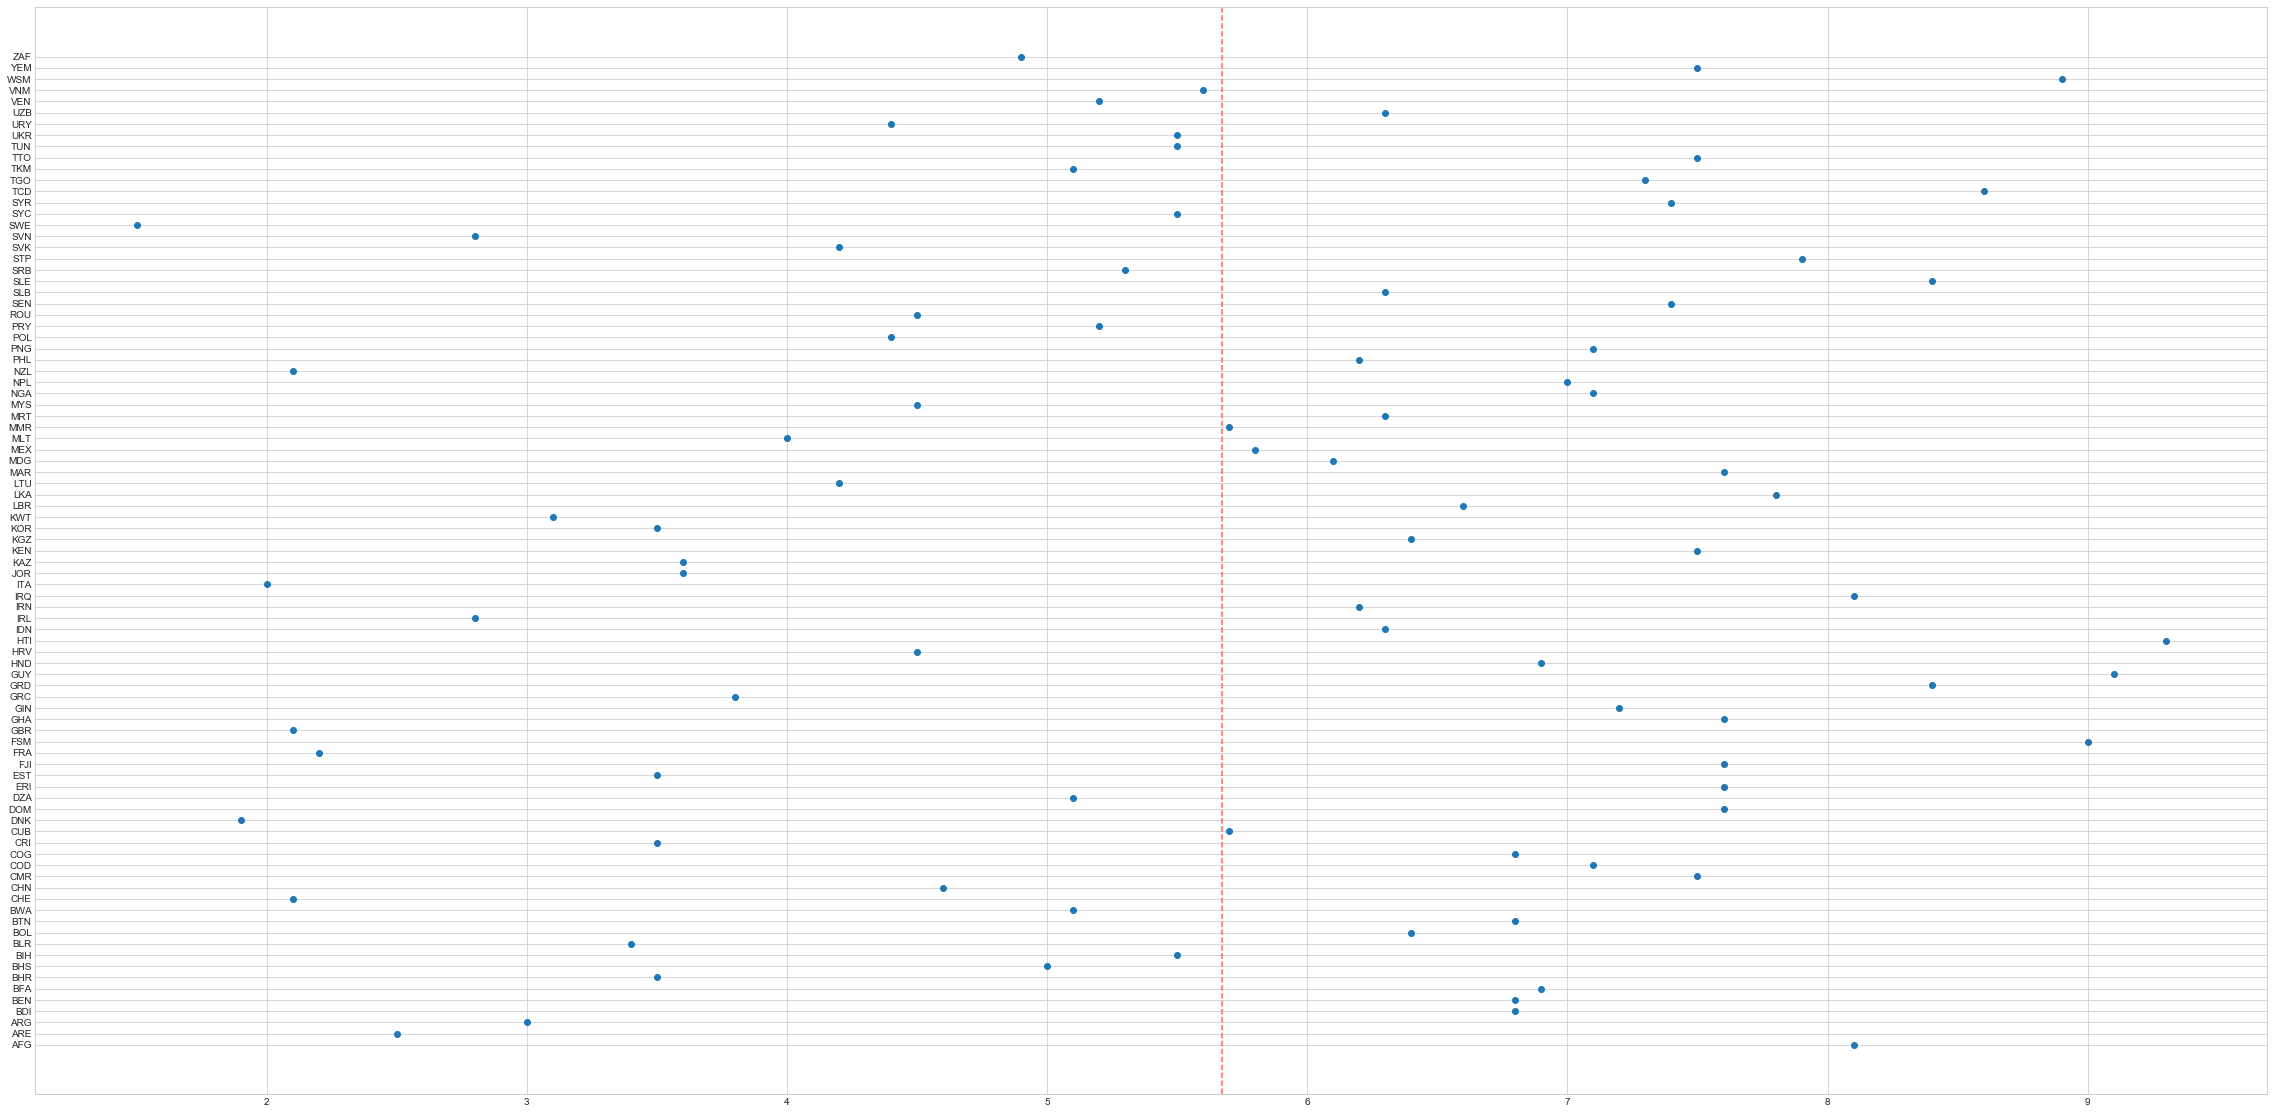

In [149]:
dotplot(subsample,'ffp_hf','ccodealp',True,'mean')

C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


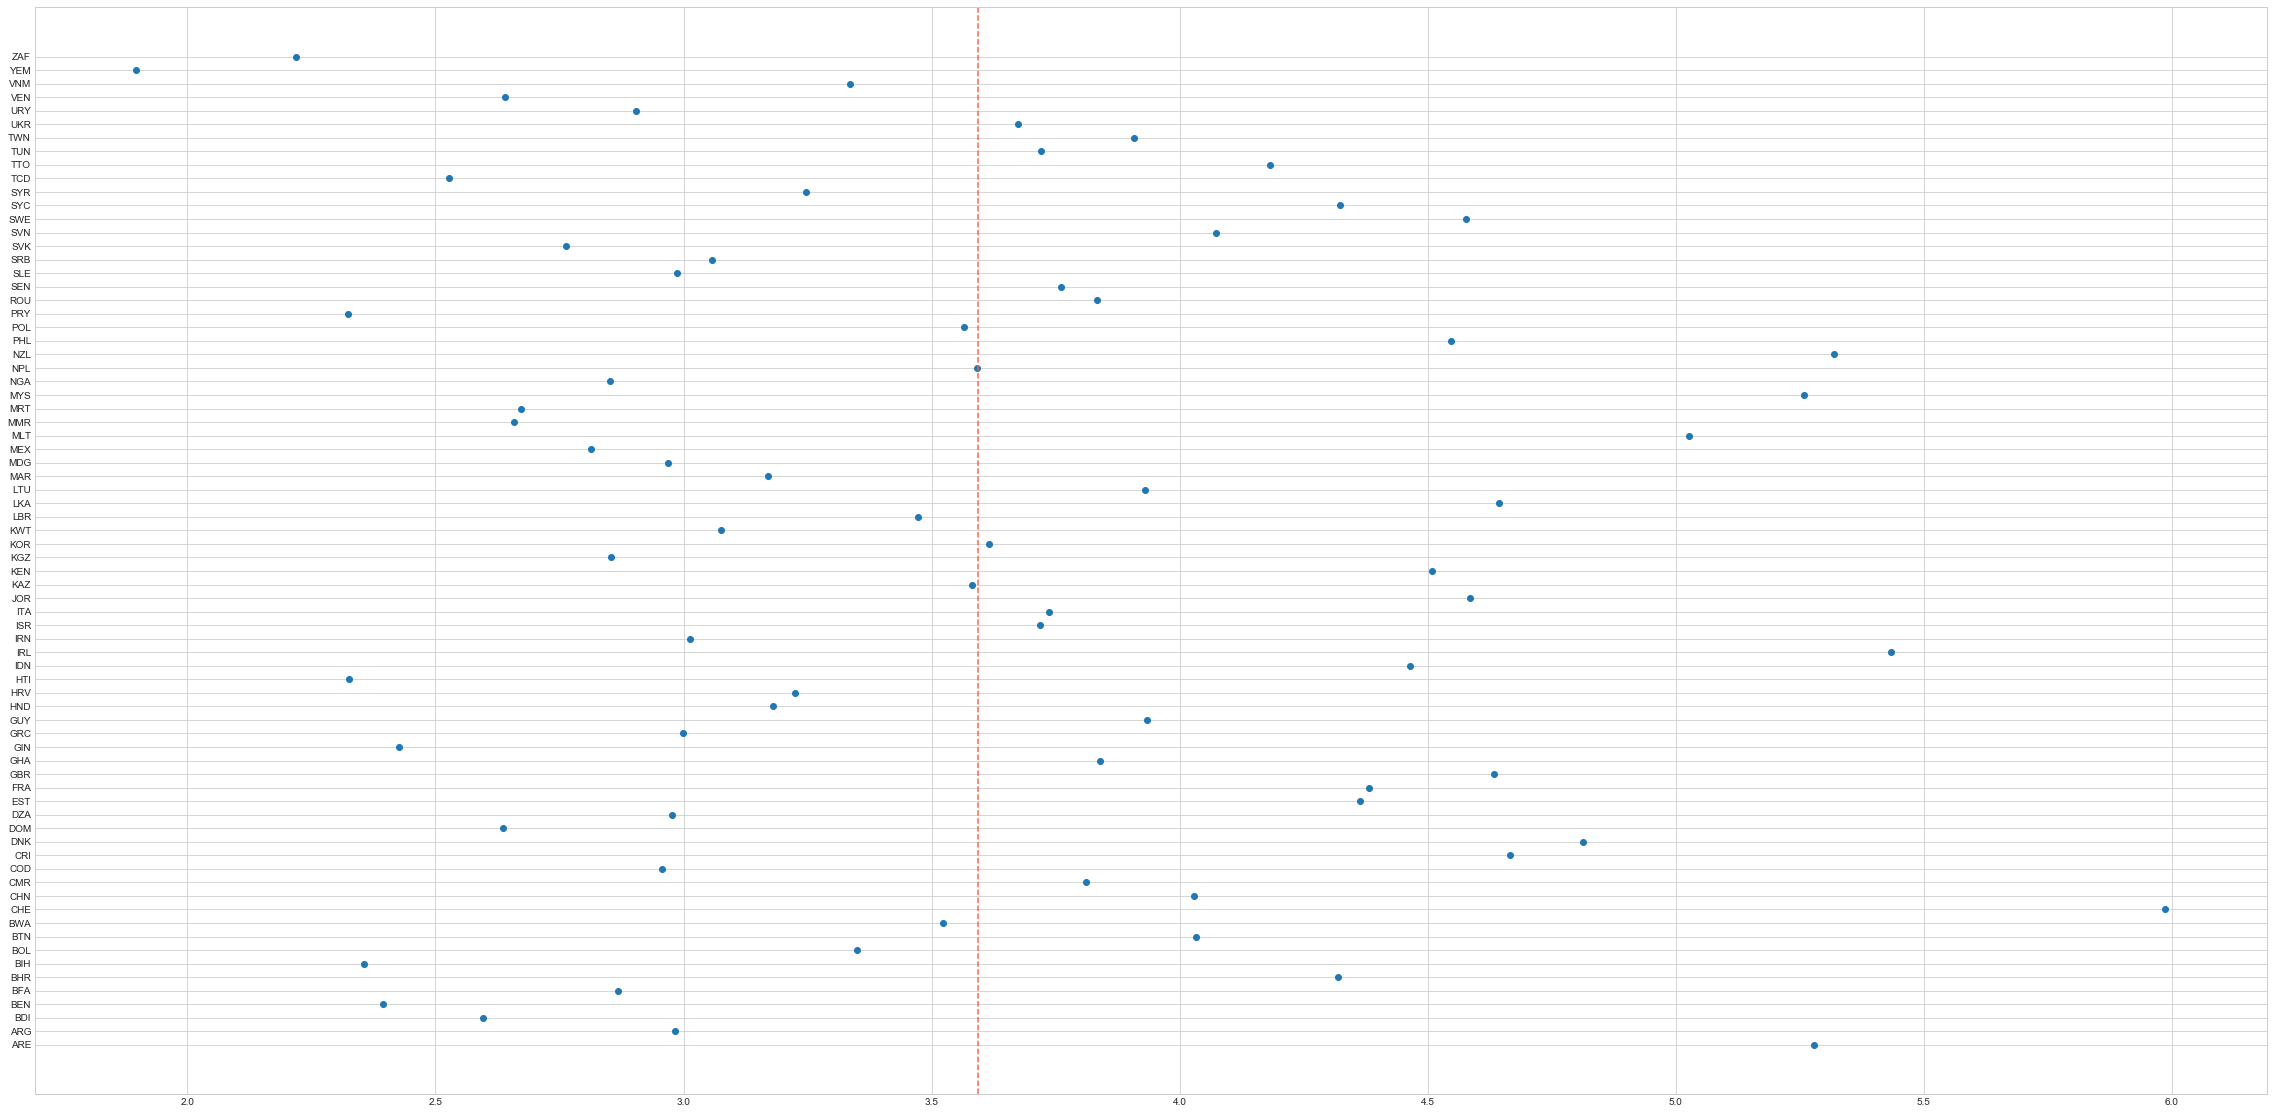

In [117]:
dotplot(subsample,'wef_qes','ccodealp',True,'mean')

C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Walther\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


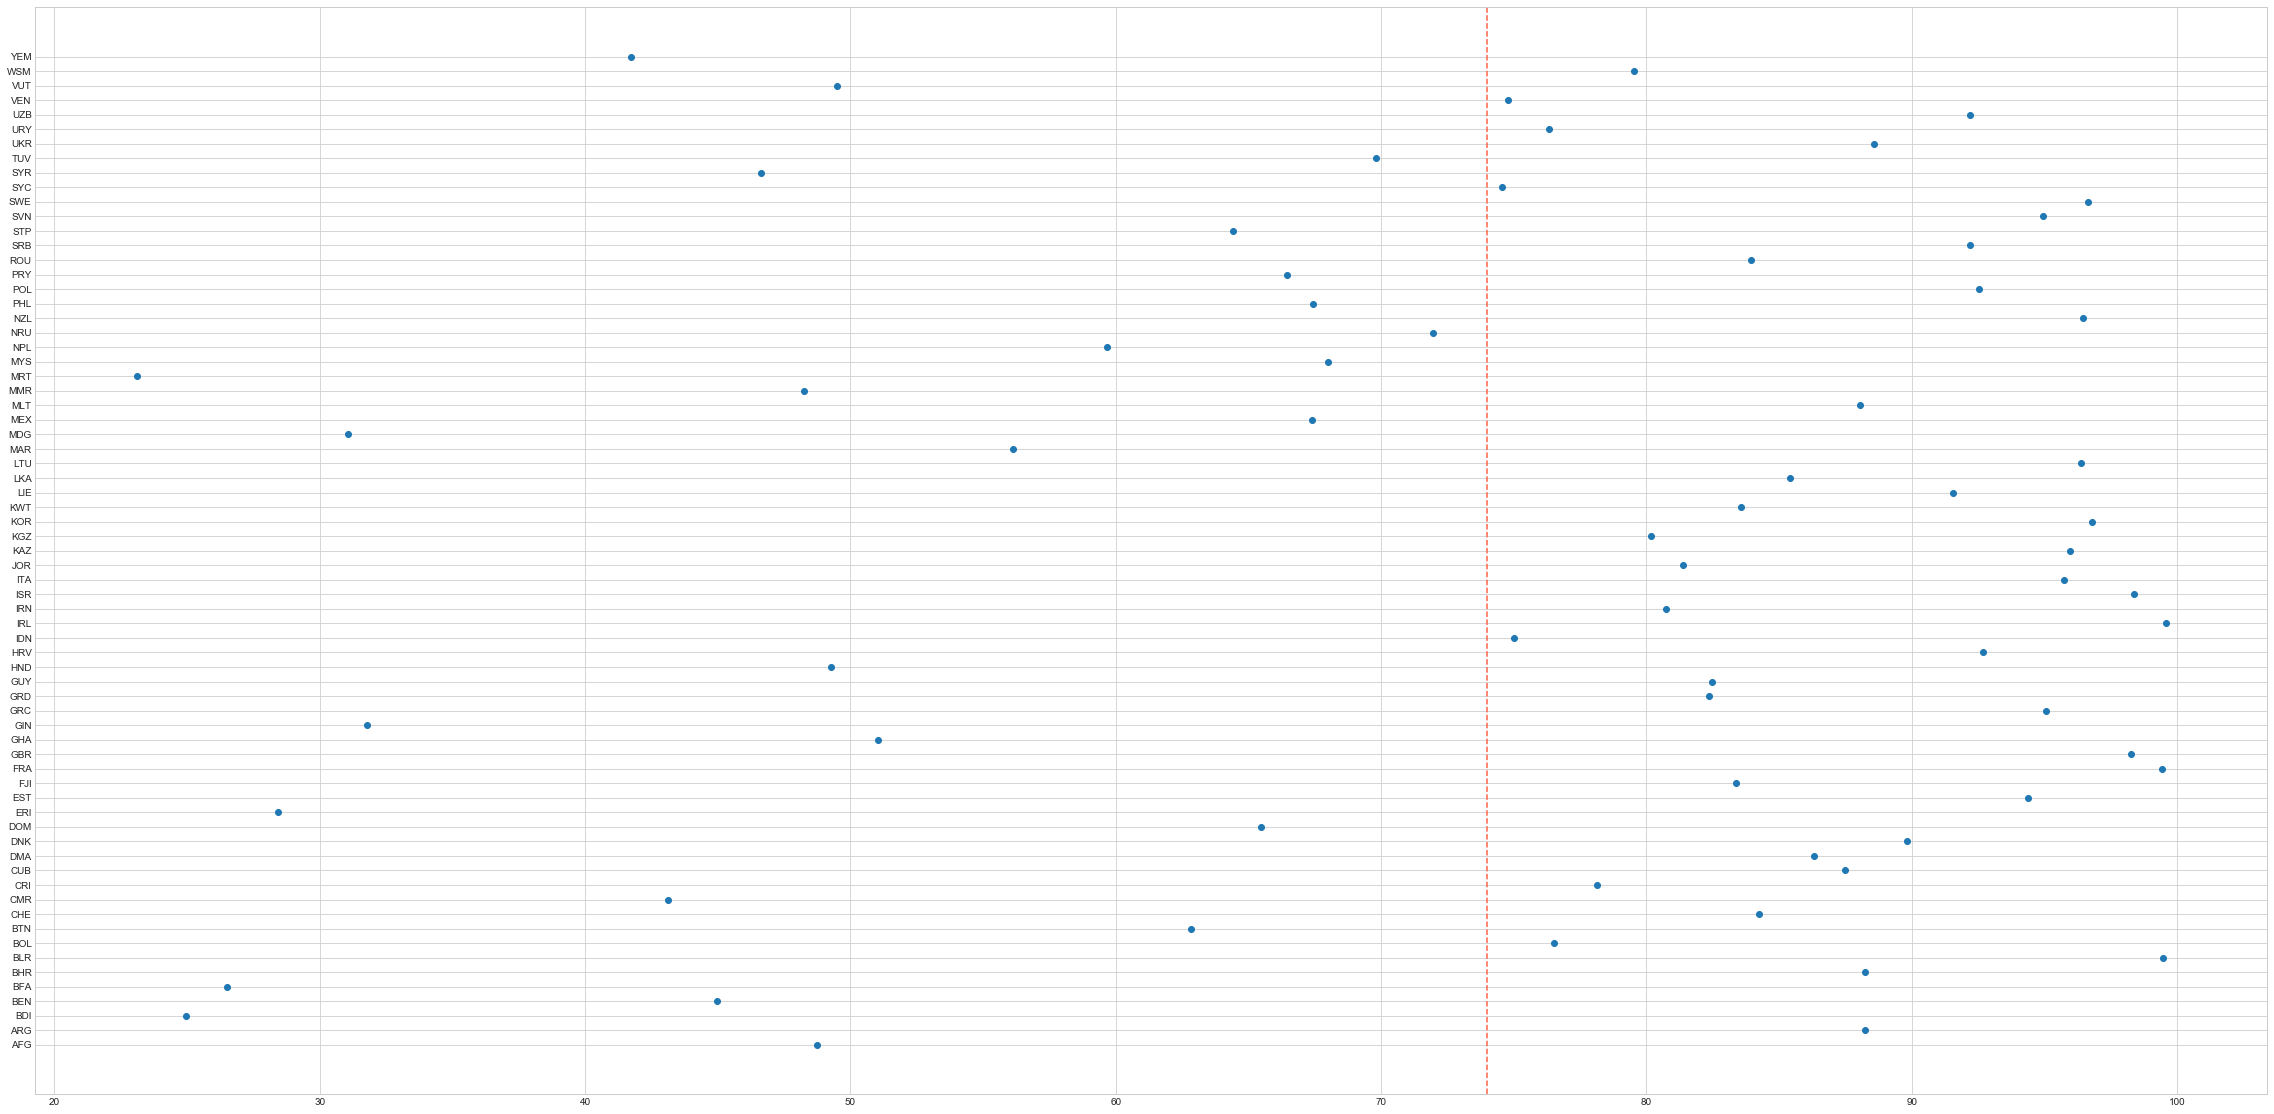

In [136]:
dotplot(subsample,'wdi_ners','ccodealp',True,'mean')

### 6. Guarde la base de datos
* La submuestra creada tiene un método llamado to_csv.

* Acceda a este y guarde la base de datos con la siguiente nomenclatura: subsample_< iniciales >_demo.csv
(Subela a la plataforma, junto al desafío)

In [158]:
subsample.to_csv('subsample_wb_demo.csv',index=False)

In [159]:
df_tes = pd.read_csv('subsample_wb_demo.csv')
df_tes.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,0.479,AFG,8,1282.64000,29.825001,8.1,NaN,3.78028,48.750320
1,0.836,ARE,3,20310.10900,NaN,2.5,5.279841,NaN,NaN
2,0.826,ARG,2,15102.61000,41.733002,3.0,2.983357,5.32549,88.246002
3,0.406,BDI,4,663.57001,NaN,6.8,2.595249,5.41642,24.948179
4,0.481,BEN,4,1413.05000,10.320000,6.8,2.393939,4.32068,44.969818
